In [9]:
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
y0 = 2 * [1] + 4 * [0]
y1 = 2 * [0] + 2 * [1] + 2 * [0]
y2 = 4 * [0] + 2 * [1]

print(y0)
print(y1)
print(y2)

[1, 1, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 1]


In [11]:
y_one_hot = np.stack([y0, y1, y2], axis=1)
y_one_hot

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [12]:
# This is it!
print('y_one_hot.shape = ', y_one_hot.shape)
num_thresh = 4
y_oh_3d = np.stack(num_thresh * [y_one_hot], axis=1)

page_one = 0
page_two = 1
page_three = 2

print('-----------------')
print('page_one.shape =', y_oh_3d[:,:, page_one].shape)
print('page_one = \n', y_oh_3d[:,:, page_one])
print('-----------------')
print('page_two.shape =', y_oh_3d[:,:, page_two].shape)
print('page_two = \n', y_oh_3d[:,:, page_two])
print('-----------------')
print('page_three.shape =', y_oh_3d[:,:, page_three].shape)
print('page_three = \n', y_oh_3d[:,:, page_three])
print('-----------------')

y_one_hot.shape =  (6, 3)
-----------------
page_one.shape = (6, 4)
page_one = 
 [[1 1 1 1]
 [1 1 1 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
-----------------
page_two.shape = (6, 4)
page_two = 
 [[0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [0 0 0 0]
 [0 0 0 0]]
-----------------
page_three.shape = (6, 4)
page_three = 
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 1 1]
 [1 1 1 1]]
-----------------


In [13]:
print('y_one_hot.shape = ', y_one_hot.shape)

feat_one = 0
feat_two = 1
feat_three = 2

print('-----------------')
print('feat_one.shape =', y_oh_3d[:,feat_one, :].shape)
print('feat_one = \n', y_oh_3d[:,feat_one, :])

print('-----------------')
print('feat_two.shape =', y_oh_3d[:,feat_two, :].shape)
print('feat_two = \n', y_oh_3d[:,feat_two, :])

print('-----------------')
print('feat_three.shape =', y_oh_3d[:,feat_three, :].shape)
print('feat_three = \n', y_oh_3d[:,feat_three, :])




y_one_hot.shape =  (6, 3)
-----------------
feat_one.shape = (6, 3)
feat_one = 
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]
-----------------
feat_two.shape = (6, 3)
feat_two = 
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]
-----------------
feat_three.shape = (6, 3)
feat_three = 
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]


#### Comments:
- We can multiply this with a threshold mask which has the size of `N x t x c`.
- `N` is the number of features.
- `t` is the number of thresholds.
- `c` is the number of classes.

In [14]:
from dataclasses import dataclass
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = load_iris()
X,y = data['data'], data['target']

In [17]:
feat_index = 1

thresh = np.unique(X[:,feat_index]).reshape(1,-1)
selected_feat = X[:,feat_index].reshape(-1,1)
is_left_sampler = (selected_feat <= thresh)
is_right_sampler = ~is_left_sampler

In [18]:
print(is_left_sampler.shape)
print(is_right_sampler.shape)

(150, 23)
(150, 23)


In [19]:
def one_hot_encode(y):
    num_cats = np.unique(y).shape[0]
    return np.eye(num_cats)[y], num_cats

y_one_hot, num_cats = one_hot_encode(y)
print('y_one_hot.shape = ', y_one_hot.shape)
print('num_cats = ', num_cats)

y_one_hot.shape =  (150, 3)
num_cats =  3


In [25]:
num_thresh = is_left_sampler.shape[1]
y_oh_3d = np.stack(num_thresh * [y_one_hot], axis=1)
print(y_oh_3d.shape)

(150, 23, 3)


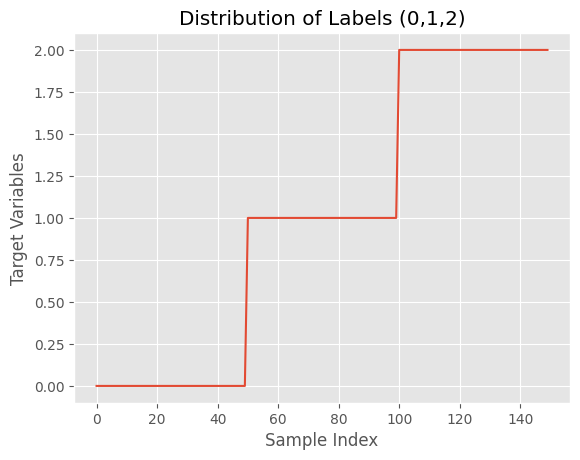

In [32]:
import matplotlib.pyplot as plt

figsize=(7,5)

plt.style.use('ggplot')
plt.plot(np.arange(y.shape[0]), y)
plt.title('Distribution of Labels (0,1,2)')
plt.xlabel('Sample Index')
plt.ylabel('Target Variables')
plt.show()

In [29]:
row_min_seg = 50
row_max_seg = row_min_seg + 3

max_num_thresh = y_oh_3d.shape[1]

thresh_min_seg = max_num_thresh // 2
thresh_max_seg = thresh_min_seg + 3

print('y_oh_3d.shape = ', y_oh_3d.shape)
print('min_segment = ', row_min_seg)
print('max_segment = ', row_max_seg)

print('y_oh_3d(page_zero): \n', y_oh_3d[row_min_seg:row_max_seg, thresh_min_seg:thresh_max_seg, 0])
print('--------------------------------')
print('y_oh_3d(page_one): \n', y_oh_3d[row_min_seg:row_max_seg, thresh_min_seg:thresh_max_seg, 1])
print('--------------------------------')
print('y_oh_3d(page_two): \n', y_oh_3d[row_min_seg:row_max_seg, thresh_min_seg:thresh_max_seg, 2])
print('--------------------------------')

y_oh_3d.shape =  (150, 23, 3)
min_segment =  50
max_segment =  53
y_oh_3d(page_zero): 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
--------------------------------
y_oh_3d(page_one): 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
--------------------------------
y_oh_3d(page_two): 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
--------------------------------


In [15]:
is_left_sampler_3d = np.stack(num_cats * [ is_left_sampler ], axis=2)
is_right_sampler_3d = np.stack(num_cats * [ is_right_sampler ], axis=2)

print(is_left_sampler_3d.shape)
print(is_right_sampler_3d.shape)

(150, 35, 3)
(150, 35, 3)


In [20]:
row_min_seg = 4
row_max_seg = row_min_seg + 3

print('is_left_sampler_3d (page_zero): \n', is_left_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 0])
print('--------------------------------')
print('is_left_sampler_3d (page_one): \n', is_left_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 1])
print('--------------------------------')
print('is_left_sampler_3d (page_two): \n', is_left_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 2])
print('--------------------------------')

is_left_sampler_3d (page_zero): 
 [[False False False]
 [False False False]
 [ True  True  True]]
--------------------------------
is_left_sampler_3d (page_one): 
 [[False False False]
 [False False False]
 [ True  True  True]]
--------------------------------
is_left_sampler_3d (page_two): 
 [[False False False]
 [False False False]
 [ True  True  True]]
--------------------------------


In [21]:
print('is_right_sampler_3d (page_zero): \n', is_right_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 0])
print('--------------------------------')
print('is_right_sampler_3d (page_one): \n', is_right_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 1])
print('--------------------------------')
print('is_right_sampler_3d (page_two): \n', is_right_sampler_3d[row_min_seg:row_max_seg, row_min_seg:row_max_seg, 2])
print('--------------------------------')

is_right_sampler_3d (page_zero): 
 [[ True  True  True]
 [ True  True  True]
 [False False False]]
--------------------------------
is_right_sampler_3d (page_one): 
 [[ True  True  True]
 [ True  True  True]
 [False False False]]
--------------------------------
is_right_sampler_3d (page_two): 
 [[ True  True  True]
 [ True  True  True]
 [False False False]]
--------------------------------
